### Machine Learning Basics

#### Terminology: *Regression vs Classification*

* **Regression**: the desired output consists of one or more continuous variables (e.g. height as a function of age and weight);
* **Classification**: samples belong to two or more classes and we want to learn from already labeled data how to predict the class of unlabeled data (e.g. handwritten digit recognition)

## Scikit-Learn: an overview

1. Choose a class of model by importing the appropriate estimator class:  
    `from sklearn.linear_model import LinearRegression`  
    
2. Choose model hyperparameters by instantiating this class with desired values:  
    `model = LinearRegression(fit_intercept=True)`  
    
3. Arrange data into a features matrix and target vector:  
    `features = boston.data[:, 0:2]`  
    `target = boston.target` 

4. Fit the model to your data by calling the fit() method of the model instance:  
    `model.fit(features, target)`

5. Apply the Model to new data:  
    `model.predict(features)`
    - For supervised learning, often we predict labels for unknown data using the `predict()` method.
    - For unsupervised learning, we often transform or infer properties of the data using the `transform()` or `predict()` method.

In [3]:
#Load Libraries
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston

In [4]:
#Load data with only two features

boston = load_boston()
features = boston.data[:,0:2]
target = boston.target

print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [7]:
#Let's import pandas library
import pandas as pd

In [6]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['target'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [9]:
#Create linear regression
regression = LinearRegression()

#Fit the linear regression
model = regression.fit(features, target)


In [13]:
#View the intercept
#value that the y variable has when the feature value is equal to 0
#the price that our algorith will predict for a house that is placed in an area with 0 crime rate

model. intercept_*1000 #(prices are in 1000 of dollar)

22485.628113468225

In [15]:
# View the feature coefficients
model.coef_ #how house prices depend on the first coefficient

array([-0.35207832,  0.11610909])

In [17]:
#First value in the target vector multiplied by 1000

#price of the first house in the dataset

target[0]*1000

24000.0

In [18]:
#Predict the target value of the first observation, multiplied by 1000

model.predict(features)[0]*1000

24573.366631705547

In [21]:
#First coefficient multiplied by 1000
#relationship between price and crime rate — crime rate increases by 1, house price decreases by 352 USD

model.coef_[0]*1000

-352.07831564026765

#### Classification

1. Let's look at the Iris dataset
2. 3 classes
3. 50 samples for each class

In [22]:
# Decision Tree classifier
#predict the value of the target variable by learning simple decision rules from the data features

In [23]:
#Load libraries

from sklearn import datasets

#Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target


In [24]:
#import pandas again and the dataset

import pandas as pd
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [25]:
#Load libraries

from sklearn.tree import DecisionTreeClassifier

#Create decision treee object
dt = DecisionTreeClassifier(random_state=0)

#Train model
model = dt.fit(features, target)
model

DecisionTreeClassifier(random_state=0)

In [26]:
#make predictions 

expected = target
predicted = model.predict(features)

Text(0.5, 1.0, 'Predicted')

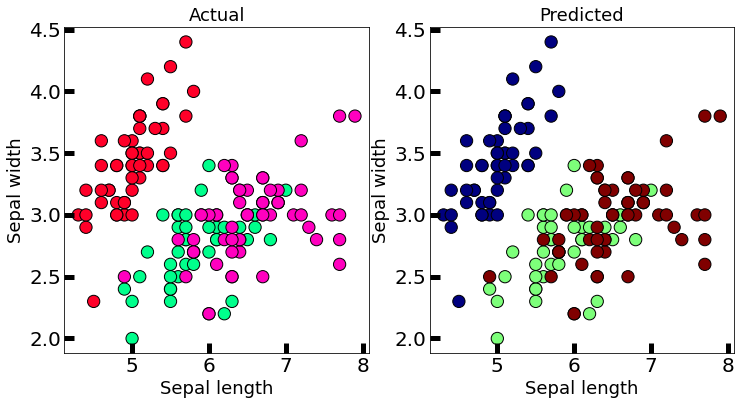

In [28]:
import matplotlib.pyplot as plt

new_labels = predicted
#this will tell us to which cluster does the data observations belong.
y = iris.target

# Plot the identified clusters and compare with the answers
fig, axes = plt.subplots(1, 2, figsize=(12,6))
axes[0].scatter(features[:, 0], features[:, 1], c=y, cmap='gist_rainbow',
edgecolor='k', s=150)
axes[1].scatter(features[:, 0], features[:, 1], c=new_labels, cmap='jet',
edgecolor='k', s=150)
axes[0].set_xlabel('Sepal length', fontsize=18)
axes[0].set_ylabel('Sepal width', fontsize=18)
axes[1].set_xlabel('Sepal length', fontsize=18)
axes[1].set_ylabel('Sepal width', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)

<IPython.core.display.Javascript object>


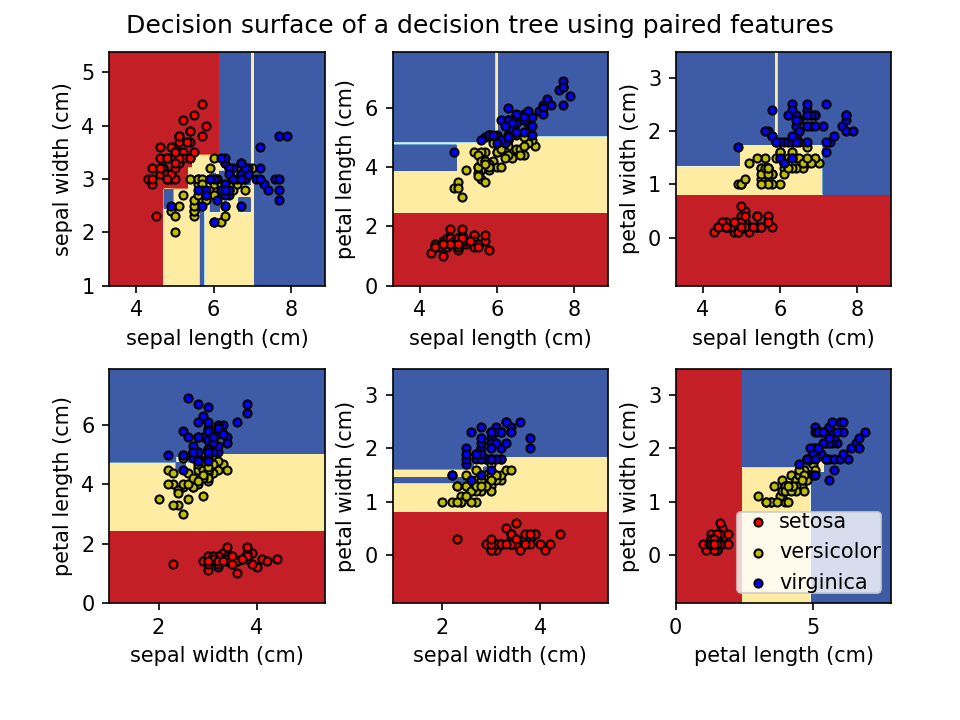

<IPython.core.display.Javascript object>


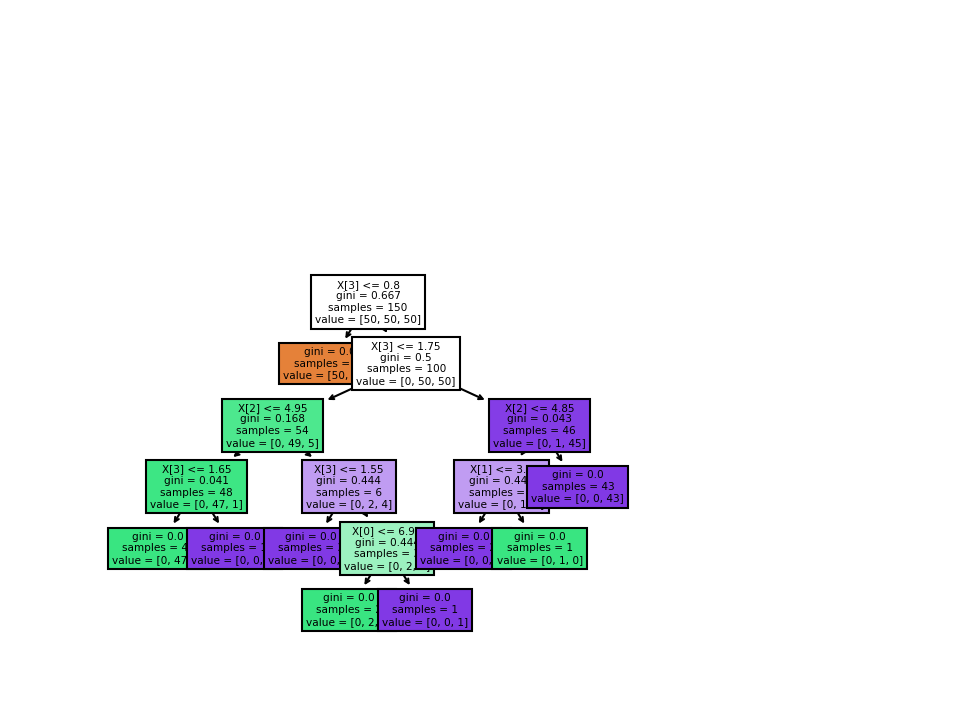

In [29]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

# Load data
iris = load_iris()

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")

plt.figure()
clf = DecisionTreeClassifier().fit(iris.data, iris.target)
plot_tree(clf, filled=True)
plt.show()

### Classification:Evaluation

In [32]:
#Load libraries

from sklearn import metrics

In [33]:
# summarize the fit

print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        50

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150

[[50  0  0]
 [ 0 50  0]
 [ 0  0 50]]


### Cross-validation

**Goal**: evaluating how well the model does on *unseen* data

Sklearn method `train_test_split()` to split the data set into test and train samples

Ref: https://www.kaggle.com/alexisbcook/cross-validation


In [34]:
# Load libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd

# Load data
iris = datasets.load_iris()

# Create feature matrix
features = iris.data

# Create target vector
target = iris.target

# Create list of target class names
class_names = iris.target_names

# Create training and test set
features_train, features_test, target_train, target_test = train_test_split(
    features, target, random_state=0, test_size=0.25)

# Create classifier
classifier = DecisionTreeClassifier(random_state=0)

# Train model and make predictions
target_predicted = classifier.fit(features_train,
    target_train).predict(features_test)

# summarize the fit of the model
print(metrics.classification_report(target_test, target_predicted))
print(metrics.confusion_matrix(target_test, target_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


## Other classification algorithms

* Logistic Regression
* Decision Tree/Random Forest
* Neural Networks
* Naive Bayes
* K-Nearest Neighbors
* Support Vector Machines

# Unsupervised Learning: Clustering

## Clustering: common use-cases

* **Recommender systems**, which involve grouping together users with similar viewing patterns in order to recommend similar content.
* **Customer segmentation**, or understanding different customer groups around which to build marketing or other business strategies.
* **Genetics**, for example clustering DNA patterns to analyze evolutionary biology.
* **Anomaly detection**, including fraud detection or detecting defective mechanical parts (i.e., predictive maintenance).

Ref: https://blog.dataiku.com/unsupervised-machine-learning-use-cases-examples

## Clustering: K-Means algorithm

**Goal**: group observations into k groups (with each group having roughly equal variance)

**Hyperparameter**: number of groups k

**Assumptions**:  
* clusters are convex shaped (e.g., a circle, a sphere);
* all features are equally scaled (if needed, standardize features);
* groups are balanced (i.e., have roughly the same number of observations)

**Algorithm**:  
1. k cluster “center” points are created at random locations.

2. For each observation:

    - The distance between each observation and the k center points is calculated.

    - The observation is assigned to the cluster of the nearest center point.

3. The center points are moved to the means (i.e., centers) of their respective clusters.

4. Steps 2 and 3 are repeated until no observation changes in cluster membership.

In [36]:
# Load libraries
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load data
iris = datasets.load_iris()
features = iris.data

# Standardize features
scaler = StandardScaler()
features_std = scaler.fit_transform(features)

# Create k-mean object
cluster = KMeans(n_clusters=3, random_state=0)

# Train model
model = cluster.fit(features_std)

<IPython.core.display.Javascript object>


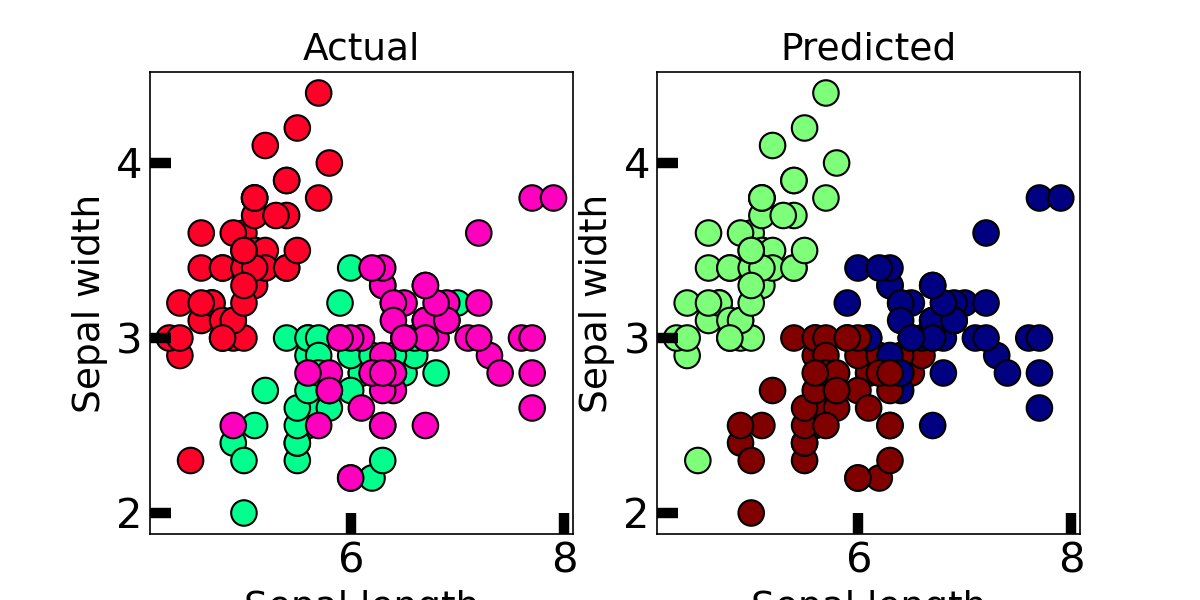

Text(0.5, 1.0, 'Predicted')

In [38]:
y = iris.target
#this will tell us to which cluster does the data observations belong.
new_labels = model.labels_

# Plot the identified clusters and compare with the answers
fig, axes = plt.subplots(1, 2, figsize=(8,4))
axes[0].scatter(features[:, 0], features[:, 1], c=y, cmap='gist_rainbow',
edgecolor='k', s=150)
axes[1].scatter(features[:, 0], features[:, 1], c=new_labels, cmap='jet',
edgecolor='k', s=150)
axes[0].set_xlabel('Sepal length', fontsize=18)
axes[0].set_ylabel('Sepal width', fontsize=18)
axes[1].set_xlabel('Sepal length', fontsize=18)
axes[1].set_ylabel('Sepal width', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)

## Categorical features

#### Label Encoder
Label encoding assigns each unique value to a different integer. This approach assumes an ordering of the categories (*ordinal variables*).  
Sklearn implementation: `LabelEncoder()`



#### One-Hot Encoder
One-hot encoding creates new columns indicating the presence (or absence) of each possible value in the original data. This approach does not assume an ordering of the categories (*nominal variables*). It does not perform well if the categorical variable takes on a large number of values.
Sklearn implementation: `OneHotEncoder()`


Ref: https://www.kaggle.com/alexisbcook/categorical-variables

In [39]:
# import the necessary module
from sklearn import preprocessing

# create the Labelencoder object
le = preprocessing.LabelEncoder()

#convert the categorical columns into numeric
encoded_value = le.fit_transform(["paris", "paris", "tokyo", "amsterdam"])

encoded_value

array([1, 1, 2, 0], dtype=int64)

In [41]:
# import the necessary module
from sklearn import preprocessing

# create the Labelencoder object
oe = preprocessing.OneHotEncoder()

#convert the categorical columns into numeric
encoded_value = oe.fit_transform(np.array(["paris", "paris", "tokyo", "amsterdam"]).reshape(-1, 1))

encoded_value.todense()

matrix([[0., 1., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [1., 0., 0.]])

###### OK. 24.02.2021.